# Loan approval classification project

The dataset contains total 14 columns consisting of 13 feature columns and 1 target variable.

## Dataset description

1. person_age: person's age in `int`
2. person_gender: gender as Male or Female in `object`
3. person_education: High School, Bachelor, Master, Associate, Doctorate in `object`
4. person_income: person's income in `float`
5. person_emp_exp: person's employment experience in `int`
6. person_home_ownership: as Own, Rent, Mortgage, other in `object`
7. loan_amnt: loan amount in `float`
8. loan_intent: loan intention as , Education, Medical, Venture, Personal, Debt consolidation, Home improvement in `object`
9. loan_int_rate: interest rate on loan in `float`
10. loan_percent_income: loan to income ratio in `float`
11. cb_person_cred_hist_length: credit history length (in years) in `float`
12. credit_score: credit score in `float`
13. previous_loan_defaults_on_file: previous on file default as Yes or No in `object`
14. loan_status: 1 for 'Approved' and 0 for 'Not approved' in `int`

## Main objective

The main objective of this project is to fit the dataset into three classification models: Logistic Regression, Decision tree and Random forest.

This is an imbalanced dataset, so using Stratified shuffle split to split the data into training and testing sets will help in getting better results.

Find the best estimators for Decision tree and Random forest classification using GridSearchCV before fitting the dataset into these models.

Comparison of the three models is done based on: accuracy, precision, recall and f1-score. I have also generated confusion matrix for visual comparison.

In [ ]:
# importing essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing scikit-learn library for machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [ ]:
# importing dataset
data = pd.read_csv('loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
# finding shape, null values and duplicated data
print(f'Shape: {data.shape}')
print(f'Null values: \n{data.isnull().sum()}')
print(f'Total data duplicates: {data.duplicated().sum()}')

Shape: (45000, 14)
Null values: 
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Total data duplicates: 0


In [ ]:
# finding unique values in each of the columns
data.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [ ]:
data.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
# separating feature columns (categorical and non-categorical) and target variables
target_variable = 'loan_status'

cat_var = ['person_gender',
           'person_education',
           'person_home_ownership',
           'loan_intent',
           'previous_loan_defaults_on_file']

no_cat_var = [x for x in data.columns if x not in cat_var + [target_variable]]

print(f'Categorical features: {cat_var}')
print(f'Non-categorical features: {no_cat_var}')

Categorical features: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Non-categorical features: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [ ]:
# finding unique values in cat_var columns
for var in cat_var:
  print(data[var].value_counts(),'\n')

person_gender
male      24841
female    20159
Name: count, dtype: int64 

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64 

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64 

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64 

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64 



We see that there is no particular ordinal relationship in any of the feature columns, we will use one-hot encoding for each of these features.

In [ ]:
# performing one-hot encoding for feature colums in cat_var
ohe_cat_var = pd.get_dummies(data[cat_var], drop_first=True).astype('int')
ohe_cat_var.head()

,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
# concatenating categorical and non-categorical features into total_feature_df
total_feature_df = pd.concat([data[no_cat_var], ohe_cat_var], axis=1)
total_feature_df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,0,...,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,0,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,...,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# checking how many extra columns have been added due to one-hot encoding
total_feature_df.shape[1] - data.shape[1]

8

In [ ]:
# checking value distribution in target variable
data[target_variable].value_counts()

,count
loan_status,
0,35000
1,10000


The target variables is highly imbalanced, so we will use stratified split for our dataset

In [ ]:
# creating a blank error_matrix dataframe for train and test datasets
error_matrix_train = pd.DataFrame(index = ['accuracy', 'precision', 'recall', 'f1_score'])
error_matrix_test = pd.DataFrame(index = ['accuracy', 'precision', 'recall', 'f1_score'])

feature_df = pd.DataFrame(index = total_feature_df.columns)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

SSS = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(SSS.split(total_feature_df, data[target_variable]))

X_train = total_feature_df.iloc[train_idx]
X_test = total_feature_df.iloc[test_idx]

y_train = data[target_variable].iloc[train_idx]
y_test = data[target_variable].iloc[test_idx]

In [ ]:
len(train_idx), len(test_idx)

(31500, 13500)

### Logistic regression as a classification model

In [ ]:
log_reg = LogisticRegression()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg.fit(X_train,y_train)

y_lr_train_pred = log_reg.predict(X_train)
y_lr_test_pred = log_reg.predict(X_test)

In [ ]:
# calculating feature importance for logistic regression model
features_lr = log_reg.coef_

feature_df['coef_val_lr'] = features_lr[0]

In [ ]:
# calculating accuracy, precision, recall, confusion matrix and classification report
accuracy_train = accuracy_score(y_train,y_lr_train_pred)
accuracy_test = accuracy_score(y_test,y_lr_test_pred)

precision_train = precision_score(y_train,y_lr_train_pred)
precision_test = precision_score(y_test,y_lr_test_pred)

recall_train = recall_score(y_train,y_lr_train_pred)
recall_test = recall_score(y_test,y_lr_test_pred)

f1_train = f1_score(y_train,y_lr_train_pred)
f1_test = f1_score(y_test,y_lr_test_pred)

cm_lr = confusion_matrix(y_test,y_lr_test_pred)

cr_train_lr = classification_report(y_train,y_lr_train_pred)
cr_test_lr = classification_report(y_test,y_lr_test_pred)

error_matrix_train['LR'] = [accuracy_train, precision_train, recall_train, f1_train]
error_matrix_test['LR'] = [accuracy_test, precision_test, recall_test, f1_test]

print(f'Classification report (Trian) \n {cr_train_lr} \n Classificaion report (Test) \n {cr_test_lr}')

Classification report (Trian) 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     24500
           1       0.78      0.75      0.76      7000

    accuracy                           0.90     31500
   macro avg       0.85      0.84      0.85     31500
weighted avg       0.90      0.90      0.90     31500
 
 Classificaion report (Test) 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     10500
           1       0.78      0.74      0.76      3000

    accuracy                           0.90     13500
   macro avg       0.86      0.84      0.85     13500
weighted avg       0.89      0.90      0.90     13500



### Decision tree as a classification model
(using grid search cv to find best parameters)

In [ ]:
# using GridSearchCV to find best parameters
params = {'max_depth': [5, 10, 50, 100, 200, 400],
          'max_features': [3,5,7,10]}

GS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = params,
                  n_jobs = -1)

GS.fit(X_train, y_train)

In [ ]:
# finding best parameters
depth_dtc = GS.best_params_.get('max_depth')
features_dtc = GS.best_params_.get('max_features')

In [ ]:
DTC = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth = depth_dtc,
                             max_features = features_dtc,
                             random_state = 42)

DTC.fit(X_train, y_train)

y_dtc_train_pred = DTC.predict(X_train)
y_dtc_test_pred = DTC.predict(X_test)

In [ ]:
# finding feature importance based on their coefficients
features_imp_dtc = DTC.feature_importances_
feature_df['coef_val_dtc'] = features_imp_dtc

In [ ]:
# calculating accuracy, precision, recall, confusion matrix and classification report
accuracy_train = accuracy_score(y_train,y_dtc_train_pred)
accuracy_test = accuracy_score(y_test,y_dtc_test_pred)

precision_train = precision_score(y_train,y_dtc_train_pred)
precision_test = precision_score(y_test,y_dtc_test_pred)

recall_train = recall_score(y_train,y_dtc_train_pred)
recall_test = recall_score(y_test,y_dtc_test_pred)

f1_train = f1_score(y_train,y_dtc_train_pred)
f1_test = f1_score(y_test,y_dtc_test_pred)

cm_dtc = confusion_matrix(y_test,y_dtc_test_pred)

cr_train_dtc = classification_report(y_train,y_dtc_train_pred)
cr_test_dtc = classification_report(y_test,y_dtc_test_pred)

error_matrix_train['DTC'] = [accuracy_train, precision_train, recall_train, f1_train]
error_matrix_test['DTC'] = [accuracy_test, precision_test, recall_test, f1_test]

print(f'Classification report (Trian) \n {cr_train_dtc} \n Classificaion report (Test) \n {cr_test_dtc}')

Classification report (Trian) 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     24500
           1       0.91      0.77      0.83      7000

    accuracy                           0.93     31500
   macro avg       0.92      0.87      0.89     31500
weighted avg       0.93      0.93      0.93     31500
 
 Classificaion report (Test) 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10500
           1       0.88      0.74      0.80      3000

    accuracy                           0.92     13500
   macro avg       0.90      0.85      0.88     13500
weighted avg       0.92      0.92      0.92     13500



### Random forest classifier as a classification model
(Using grid search cv to find best parameter)

In [ ]:
# using RandomForest as a classifier
params = {'n_estimators': [10,50,100,200,400],
          'max_depth': [1,3,5,7],
          'max_features': [3,5,7,10]}

GS_RFC = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                      param_grid= params,
                      n_jobs = -1)

GS_RFC.fit(X_train, y_train)

GS_RFC.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 400}

In [ ]:
# finding best parameters
depth_rfc = GS_RFC.best_params_.get('max_depth')
features_rfc = GS_RFC.best_params_.get('max_features')
estimators_rfc = GS_RFC.best_params_.get('n_estimators')

In [ ]:
RFC = RandomForestClassifier(n_estimators = estimators_rfc,
                             max_features = features_rfc,
                             max_depth = depth_rfc,
                             random_state=42,)

RFC.fit(X_train, y_train)

y_rfc_train_pred = RFC.predict(X_train)
y_rfc_test_pred = RFC.predict(X_test)

In [ ]:
# calculating accuracy, precision, recall, confusion matrix and classification report
accuracy_train = accuracy_score(y_train,y_rfc_train_pred)
accuracy_test = accuracy_score(y_test,y_rfc_test_pred)

precision_train = precision_score(y_train,y_rfc_train_pred)
precision_test = precision_score(y_test,y_rfc_test_pred)

recall_train = recall_score(y_train,y_rfc_train_pred)
recall_test = recall_score(y_test,y_rfc_test_pred)

f1_train = f1_score(y_train,y_rfc_train_pred)
f1_test = f1_score(y_test,y_rfc_test_pred)

cm_rfc = confusion_matrix(y_test,y_rfc_test_pred)

cr_train_rfc = classification_report(y_train,y_rfc_train_pred)
cr_test_rfc = classification_report(y_test,y_rfc_test_pred)

error_matrix_train['RFC'] = [accuracy_train, precision_train, recall_train, f1_train]
error_matrix_test['RFC'] = [accuracy_test, precision_test, recall_test, f1_test]

print(f'Classification report (Trian) \n {cr_train_rfc} \n Classificaion report (Test) \n {cr_test_rfc}')

Classification report (Trian) 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     24500
           1       0.92      0.72      0.81      7000

    accuracy                           0.92     31500
   macro avg       0.92      0.85      0.88     31500
weighted avg       0.92      0.92      0.92     31500
 
 Classificaion report (Test) 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10500
           1       0.90      0.71      0.79      3000

    accuracy                           0.92     13500
   macro avg       0.91      0.84      0.87     13500
weighted avg       0.92      0.92      0.91     13500



In [ ]:
print('Error matric for train dataset: \n {error_matrix_train}'.format(error_matrix_train=error_matrix_train))
print('\nError matric for test dataset: \n {error_matrix_test}'.format(error_matrix_test=error_matrix_test))

Error matric for train dataset: 
                  LR       DTC       RFC
accuracy   0.896635  0.931524  0.923619
precision  0.776269  0.909799  0.916274
recall     0.751429  0.768000  0.722286
f1_score   0.763647  0.832907  0.807797

Error matric for test dataset: 
                  LR       DTC       RFC
accuracy   0.896593  0.919037  0.917704
precision  0.783793  0.877026  0.902772
recall     0.738333  0.739333  0.705667
f1_score   0.760384  0.802315  0.792142


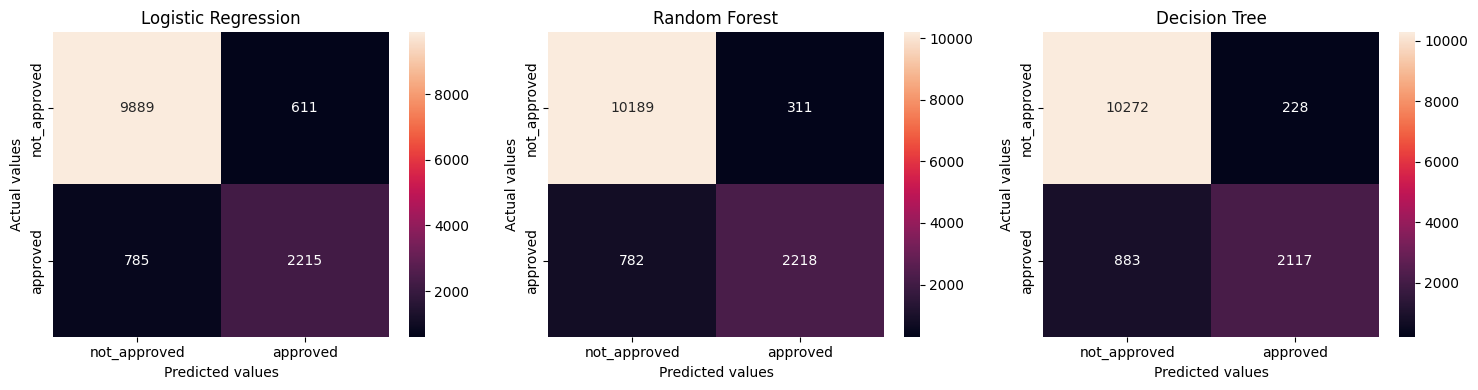

In [ ]:
# visualizing confusion matrix for all three models using heatmap
fig, ax = plt.subplots(figsize=(15, 4), ncols = 3)

ax1 = ax[0]
sns.heatmap(cm_lr, annot = True, fmt = 'd', ax = ax1,
            xticklabels= ['not_approved', 'approved'],
            yticklabels= ['not_approved', 'approved'])
ax1.set(xlabel= 'Predicted values', ylabel= 'Actual values')
ax1.set_title('Logistic Regression')

ax2 = ax[1]
sns.heatmap(cm_dtc, annot = True, fmt = 'd', ax = ax2,
            xticklabels= ['not_approved', 'approved'],
            yticklabels= ['not_approved', 'approved'])
ax2.set(xlabel= 'Predicted values', ylabel= 'Actual values')
ax2.set_title('Random Forest')

ax3 = ax[2]
sns.heatmap(cm_rfc, annot = True, fmt = 'd', ax = ax3,
            xticklabels= ['not_approved', 'approved'],
            yticklabels= ['not_approved', 'approved'])
ax3.set(xlabel= 'Predicted values', ylabel= 'Actual values')
ax3.set_title('Decision Tree')

plt.tight_layout()
plt.show()

In [ ]:
# calculation roc_score and roc_auc from all three models
auc_lr = roc_auc_score(y_test, y_lr_test_pred)
auc_dtc = roc_auc_score(y_test, y_dtc_test_pred)
auc_rfc = roc_auc_score(y_test, y_rfc_test_pred)
print(f'ROC AUC score for Logistic Regression: {auc_lr}')
print(f'ROC AUC score for Decision Tree: {auc_dtc}')
print(f'ROC AUC score for Random Forest: {auc_rfc}')

ROC AUC score for Logistic Regression: 0.8400714285714285
ROC AUC score for Decision Tree: 0.8548571428571428
ROC AUC score for Random Forest: 0.8419761904761904


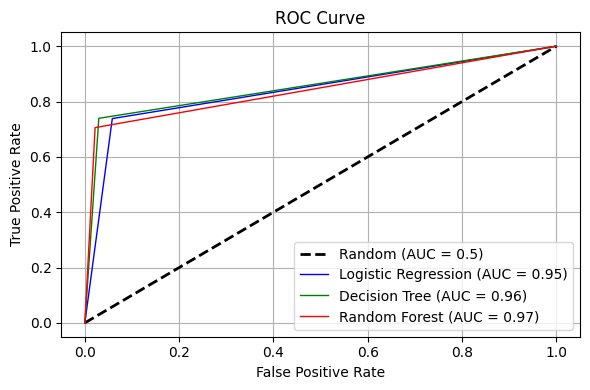

In [ ]:
# visualizing roc_auc curve using predicted y values for all three models
tpr_lr, fpr_lr, thres_lr = roc_curve(y_test, y_lr_test_pred)
tpr_dtc, fpr_dtc, thres_dtc = roc_curve(y_test, y_dtc_test_pred)
tpr_rfc, fpr_rfc, thres_rfc = roc_curve(y_test, y_rfc_test_pred)

plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth = 2.0)  # Reference line
plt.plot(tpr_lr, fpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue', linewidth = 1)
plt.plot(tpr_dtc, fpr_dtc, label=f'Decision Tree (AUC = {auc_dtc:.2f})', color='green', linewidth = 1)
plt.plot(tpr_rfc, fpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})', color='red', linewidth = 1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

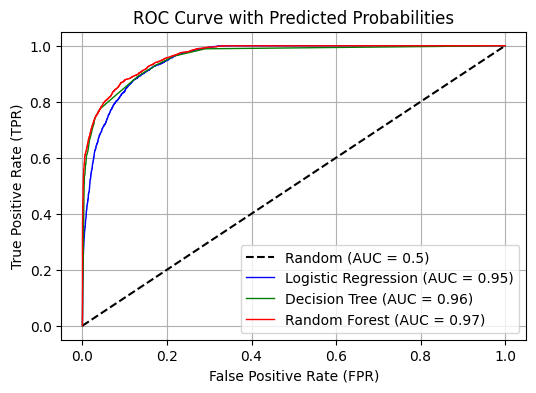

In [ ]:
# visualizing roc curve using probailities of y rather that y_pred
proba_lr = log_reg.predict_proba(X_test)[:, 1]  # Logistic Regression
proba_dtc = DTC.predict_proba(X_test)[:, 1]  # Decision Tree
proba_rfc = RFC.predict_proba(X_test)[:, 1]  # Random Forest

# Calculate FPR, TPR, and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, proba_dtc)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, proba_rfc)

auc_lr = roc_auc_score(y_test, proba_lr)
auc_dtc = roc_auc_score(y_test, proba_dtc)
auc_rfc = roc_auc_score(y_test, proba_rfc)

# Plot ROC curves
plt.figure(figsize=(6,4))
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')  # Reference line
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue', linewidth = 1)
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {auc_dtc:.2f})', color='green', linewidth = 1)
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})', color='red', linewidth = 1)

# Add labels and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Predicted Probabilities')
plt.legend()
plt.grid()
plt.show()


In [ ]:
feature_comp = pd.DataFrame({'LR':feature_df.sort_values(by = 'coef_val_lr', ascending = False).head().index,
                             'DTC':feature_df.sort_values(by = 'coef_val_dtc', ascending = False).head().index,
                             'RFC':feature_df.sort_values(by = 'coef_val_rfc', ascending = False).head().index})

feature_comp

,LR,DTC,RFC
0,loan_percent_income,previous_loan_defaults_on_file_Yes,previous_loan_defaults_on_file_Yes
1,loan_int_rate,loan_percent_income,loan_percent_income
2,person_home_ownership_RENT,loan_int_rate,loan_int_rate
3,person_age,person_income,person_income
4,person_income,person_home_ownership_RENT,person_home_ownership_RENT


In [ ]:
error_matrix_test

,RFC,DTC,LR
accuracy,0.917704,0.919037,0.896593
precision,0.902772,0.877026,0.783793
recall,0.705667,0.739333,0.738333
f1_score,0.792142,0.802315,0.760384


In [ ]:
error_matrix_train

,RFC,DTC,LR
accuracy,0.923619,0.931524,0.896635
precision,0.916274,0.909799,0.776269
recall,0.722286,0.768000,0.751429
f1_score,0.807797,0.832907,0.763647


### Key finding based on metrics

From the metrics analysis based on accuracy of the test dataset, `Decision tree classifier` performed the best (max_depth = 10 and max_feature = 10) with an accuracy of 91.9%, followed by `Random forest classifier` (n_estimator = 400, max_depth = 7 and and max_features = 5) with an accuracy of 91.7% followed by Logistic regression with an accuracy of 89.6%.

FRom precision and recall metric, we see that `Decision tree` and `Random forest` classifiers have higher`precision` than `recall`, suggesting that more number of 'not approved' was wrongly classified, which is evident from the heatmap. Whereas, `Logistic regression` shows balanced `precision` and `recall` scores.

`roc_auc_score` suggests that `Random forest` classifier gives best results when compared with other two classifiers.

### Best model

Based on the above key findings and various metric analysis, `Decision tree` and `Random forest` suits the best model for this project scenario. `Random forest` gives neary same `accuracy` but slightly better `precision` score than `Decision tree`.

However, the computation time was too high for `Random forest` compared to `Decision tree`. `Logistic regression` had the lowest computation time.

One more difference we can observe from the `feature_comp` dataframe, where the comparison of feature selection based on these three models are shown. From this data, the top 5 features with maximum importance are same for `Decision tree` and `Random forest`, however, they are different for `logistic regression`.

Based on our following requirements, we can choose our model:
1. If computation time is not an issue: `Random forest`.
2. If computation time should be least and less metric score is allowed: `Logistic regression`.
3. If we want an optimized model in terms of simplicity and computation time: `Decision tree`.

### Scope for improvement

We can use more closely related hyperparameters to tune them using `GridSearchCV` for more accurate results. We can make it work better using `cross-validation` methods to avoid overfitting. However, the model doesn't look like a overfitted model based on metric score of training and testing datasets. But the result can always be improved using other classification models.